In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean1 = np.array([0,0])
mean2 = np.array([-7,-7])
cov = np.array([[1,0],[0,1]])
data1 = np.random.multivariate_normal(mean1, cov, 15000)
data2 = np.random.multivariate_normal(mean2, cov, 20000)    

data_set = np.append(data1, data2, axis=0)
np.savetxt('input.csv',data_set,delimiter=',')

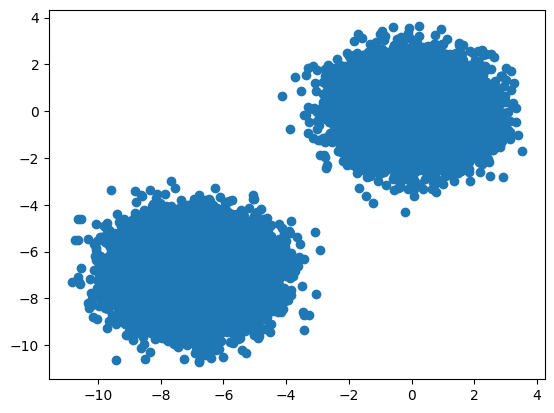

In [3]:
plt.scatter(data_set[:,0],data_set[:,1])

In [14]:
os.system("python main.py input.csv out.csv")

0

In [15]:
scores = np.loadtxt('out.csv')

In [16]:
alpha = .51
mapping = []
for i in scores:
    if(i < alpha):
        mapping.append(1)
    else:
        mapping.append(-1)


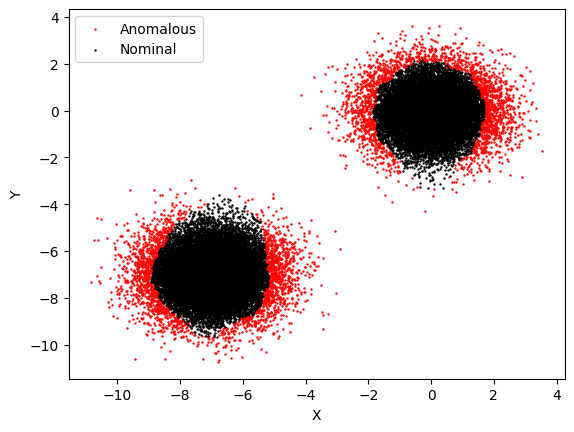

In [17]:
inlier = []
outlier = []
for count,i in enumerate(mapping):
    if(mapping[count] == 1):
        inlier.append(data_set[count])
    else:
        outlier.append( data_set[count])
inlier = np.array(inlier)
outlier = np.array(outlier)

plt.scatter(outlier[:,0],outlier[:,1], c='red',  s = .5, label = "Anomalous")
plt.scatter(inlier[:,0],inlier[:,1], c='black', s = .5, label = "Nominal")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [8]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination = .1)
model.fit(data_set)
mapping = model.predict(data_set)

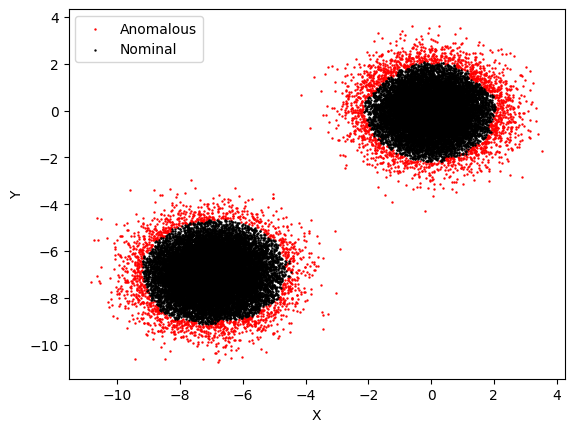

In [9]:
inlier = []
outlier = []
for count,i in enumerate(mapping):
    if(mapping[count] == 1):
        inlier.append(data_set[count])
    else:
        outlier.append( data_set[count])
inlier = np.array(inlier)
outlier = np.array(outlier)

plt.scatter(outlier[:,0],outlier[:,1], c='red',  s = .5, label = "Anomalous")
plt.scatter(inlier[:,0],inlier[:,1], c='black', s = .5, label = "Nominal")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()